In [1]:
%matplotlib inline
import numpy as np
import lib.io.stan
import matplotlib.pyplot as plt
import os

## Patient AC

In [2]:
np.random.seed(0)
data_dir = 'datasets/id001_ac'
res_dir = 'tmp'
os.makedirs(res_dir,exist_ok=True)

ntwrk = np.load(f'{data_dir}/AC_network.npz')
SC = ntwrk['SC']
gain = ntwrk['gain_mat']
sim_data_6d_ep = np.load(f'{data_dir}/AC_syn_tvb_ez=59_pz=82-74.npz')

nn = SC.shape[0]
ns  = gain.shape[0]
nt = 10000
I1 = 3.1
tau0 = 2857.0
x0 = sim_data_6d_ep['x0']
time_scale = 1.0
time_step = 0.5
nsteps = int(1.0 / time_step)
sigma = 0.0001
k = 1.0
epsilon = 0.01
x_init = -2.0*np.ones(nn)
z_init = 3.5*np.ones(nn)
z_eta = np.random.normal(size = (nt, nn))

data = {'nn':nn, 'ns':ns, 'nt':nt, 'I1':I1, 'tau0':tau0, 'SC':SC, 'gain':gain,
        'x0':x0, 'time_scale':time_scale, 'time_step':time_step, 'nsteps':nsteps,
        'sigma':sigma, 'k':k, 'epsilon':epsilon, 'x_init':x_init, 'z_init':z_init, 'z_eta':z_eta}

lib.io.stan.rdump(f'{res_dir}/AC_fit_data.R',data)

cmd = 'bash /home/anirudhnihalani/scripts/stancompile.sh vep-forwardsim-2Depileptor'
lib.io.stan.create_process(cmd.split(' '), block = True)
cmd = f"./vep-forwardsim-2Depileptor sample num_warmup=0 num_samples=1 algorithm=fixed_param data file={res_dir}/AC_fit_data.R output file={res_dir}/AC_2D_sim.csv"
lib.io.stan.create_process(cmd.split(' '), block = True)

/home/anirudhnihalani/vep.stan

--- Translating Stan model to C++ code ---
bin/stanc  /home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor.stan --o=/home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor.hpp
Model name=vep_forwardsim_2Depileptor_model
Input file=/home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor.stan
Output file=/home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor.hpp

--- Linking C++ model ---
g++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.64.0 -isystem stan/lib/stan_math/lib/cvodes_2.9.0/include -std=c++1y -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -I src -I stan/src -isystem stan/lib/stan_math/ -DEIGEN_NO_DEBUG -DFUSION_MAX_VECTOR_SIZE=12 -DNO_FPRINTF_OUTPUT -pipe -lpthread  -O3 -o /home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor src/cmdstan/main.cpp -include /home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor.hpp st

0

#### Load the simulated data

In [3]:
sim_data_2D_ep = lib.io.stan.read_samples(f'{res_dir}/AC_2D_sim.csv',0,1,ignore_warmup=True,variables_of_interest=['x','seeg','slp'])

In [4]:
sim_data_2D_ep['slp'].shape

(1, 10000, 70)

#### Compare the source activity between 2D and 6D epileptor simulations

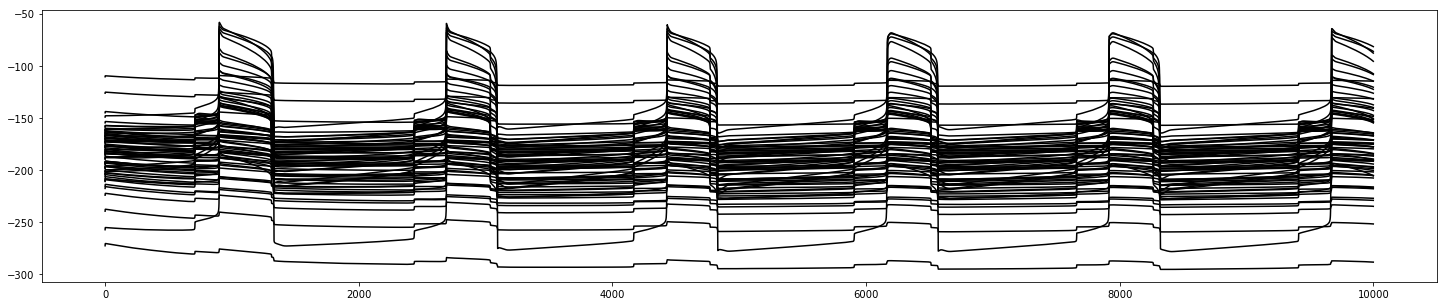

In [29]:
# plt.figure(figsize=(25,15))
# plt.subplot(121)
# src_sig = sim_data_2D_ep['x'][0,0:1600,:]
# plt.plot(src_sig/4.0 + np.r_[0:nn],'r')
# plt.yticks(np.r_[0:nn],np.r_[0:nn]);
# plt.ylabel('ROI',fontsize=13);
# plt.xlabel('time',fontsize=13);
# plt.title('Source signals(2D)');
# plt.subplot(122)
# src_sig = sim_data_6d_ep['src_sig'][2200:3800,0,:,0] + sim_data_6d_ep['src_sig'][2200:3800,3,:,0]
# plt.plot(src_sig/4.0 + np.r_[0:nn],'g')
# plt.ylabel('ROI',fontsize=13);
# plt.xlabel('time',fontsize=13);
# plt.yticks(np.r_[0:nn],np.r_[0:nn]);
# plt.title('Source signals(6D)')
# plt.tight_layout()

chnl=25
amp = 1.0
offset = 0.0
plt.figure(figsize=(25,5))
plt.plot(amp*(sim_data_2D_ep['seeg'][0,:,:]+offset),'k');
# plt.plot(sim_data_2D_ep['slp'][0,:,chnl],'r')


## Patient CJ

In [ ]:
%reset -f

%matplotlib inline
import numpy as np
import lib.io.stan
import matplotlib.pyplot as plt
import os

np.random.seed(0)
data_dir = 'datasets/id002_cj'
res_dir = 'results/exp10/exp10.3'
os.makedirs(res_dir,exist_ok=True)

ntwrk = np.load(f'{data_dir}/CJ_network.npz')
SC = ntwrk['SC']
gain = ntwrk['gain_mat']
sim_data_6d_ep = np.load(f'{data_dir}/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

nn = SC.shape[0]
ns  = gain.shape[0]
nt = 10000
I1 = 3.1
tau0 = 2857.0
x0 = sim_data_6d_ep['x0']
time_scale = 1.0
time_step = 0.1
nsteps = int(1.0 / time_step)
sigma = 0.0001
k = 1.0
epsilon = 0.01
x_init = -2.0*np.ones(nn)
z_init = 3.5*np.ones(nn)
z_eta = np.random.normal(size = (nt, nn))

data = {'nn':nn, 'ns':ns, 'nt':nt, 'I1':I1, 'tau0':tau0, 'SC':SC, 'gain':gain,
        'x0':x0, 'time_scale':time_scale, 'time_step':time_step, 'nsteps':nsteps,
        'sigma':sigma, 'k':k, 'epsilon':epsilon, 'x_init':x_init, 'z_init':z_init, 'z_eta':z_eta}

lib.io.stan.rdump(f'{res_dir}/CJ_fit_data.R',data)

cmd = 'bash /home/anirudhnihalani/scripts/stancompile.sh vep-forwardsim-2Depileptor'
lib.io.stan.create_process(cmd.split(' '), block = True)
cmd = f'./vep-forwardsim-2Depileptor sample num_warmup=0 num_samples=1 algorithm=fixed_param data file={res_dir}/CJ_fit_data.R output file={res_dir}/CJ_2D_sim.csv'
lib.io.stan.create_process(cmd.split(' '), block = True)

#### Load simulated data

In [ ]:
sim_data_2D_ep = lib.io.stan.read_samples(f'{res_dir}/CJ_2D_sim.csv',0,1,ignore_warmup=True,variables_of_interest=['x'])

#### Compare the source activity between 2D and 6D epileptor simulations

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(121)
src_sig = sim_data_2D_ep['x'][0,0:1600,:]
plt.plot(src_sig/4.0 + np.r_[0:nn],'r')
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.title('Source signals(2D)');
plt.subplot(122)
src_sig = sim_data_6d_ep['src_sig'][2200:3800,0,:,0] + sim_data_6d_ep['src_sig'][2200:3800,3,:,0]
plt.plot(src_sig/4.0 + np.r_[0:nn],'g')
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.title('Source signals(6D)')
plt.tight_layout()